---

Reconecte ao Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive", DRIVE_DIRECTORY)

---

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Regressão polinomial

Comece recuperando os dados previsores e alvo, de treino e de teste, a partir do arquivo `parkinson.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem que salvou.

In [2]:
with open('parkinson.pkl', 'rb') as f:
    x_parkinson_train, y_parkinson_train, x_parkinson_test, y_parkinson_test = pickle.load(f)

In [3]:
print(x_parkinson_train, x_parkinson_test)
print(y_parkinson_train, y_parkinson_test)

[[5.7000e+01 1.2626e+02 2.5800e-03 ... 5.8921e-01 9.7793e-02 0.0000e+00]
 [5.9000e+01 1.2847e+02 2.8500e-03 ... 6.1591e-01 1.2635e-01 1.0000e+00]
 [6.2000e+01 1.6820e+02 2.9500e-03 ... 6.1425e-01 1.7362e-01 0.0000e+00]
 ...
 [6.2000e+01 1.7519e+02 1.3280e-02 ... 6.9895e-01 3.2500e-01 0.0000e+00]
 [5.5000e+01 1.9579e+02 1.4930e-02 ... 7.3339e-01 3.4876e-01 0.0000e+00]
 [6.7000e+01 1.4492e+02 5.6100e-03 ... 7.7725e-01 2.3529e-01 0.0000e+00]] [[6.8000e+01 7.4840e+00 7.9600e-03 ... 7.0003e-01 2.5145e-01 1.0000e+00]
 [7.1000e+01 1.3422e+01 1.6860e-02 ... 7.4990e-01 4.1199e-01 0.0000e+00]
 [5.9000e+01 1.6341e+02 4.0300e-03 ... 6.9314e-01 1.7536e-01 1.0000e+00]
 ...
 [6.8000e+01 1.4492e+01 5.9400e-03 ... 7.0631e-01 2.7500e-01 1.0000e+00]
 [4.9000e+01 2.4844e+01 8.2900e-03 ... 7.1589e-01 2.7668e-01 0.0000e+00]
 [8.5000e+01 1.4701e+01 3.6800e-03 ... 5.7989e-01 1.7567e-01 1.0000e+00]]
[36.903 27.275 22.946 ... 23.122 26.002 16.559] [37.635 54.153 26.443 ... 38.23  31.38  26.323]


Instancie um transformador do tipo `PolynomialFeatures` com `degree=4`. Utilize ele para transformar os atributos previsores de treino e de teste.

In [4]:
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(x_parkinson_train)
X_test_poly = poly.fit_transform(x_parkinson_test)

Confira o `shape` dos dados previsores de treino, antes e depois de aplicar o transformador polinomial.

In [24]:
print(x_parkinson_train.shape, x_parkinson_test.shape)
print(X_train_poly.shape, X_test_poly.shape)

(4406, 19) (1469, 19)
(4406, 8855) (1469, 8855)


Instancie um regressor linear, e treine utilizando as variáveis preditoras polinomiais.

In [6]:
lrp = LinearRegression()
lrp.fit(X_train_poly, y_parkinson_train)

LinearRegression()

Calcule o score deste regressor com os dados de treino.

In [7]:
lrp.score(X_train_poly, y_parkinson_train)

0.7108992844545459

E também com os dados de teste.

In [8]:
lrp.score(X_test_poly, y_parkinson_test)

-9.962746847712683

Utilize o regressor para fazer predições baseadas nos dados de treinamento.

In [12]:
previsoes = lrp.predict(X_train_poly)
previsoes

array([31.8447778 , 31.14877323, 23.88997647, ..., 23.3803285 ,
       28.66093035, 24.19382895])

Exiba o erro absoluto médio para este split.

In [13]:
mean_absolute_error(y_parkinson_train, previsoes)

4.345806531323731

Exiba uma comparação da variável de treino entre os valores reais e preditos, na forma de um gráfico de linhas.

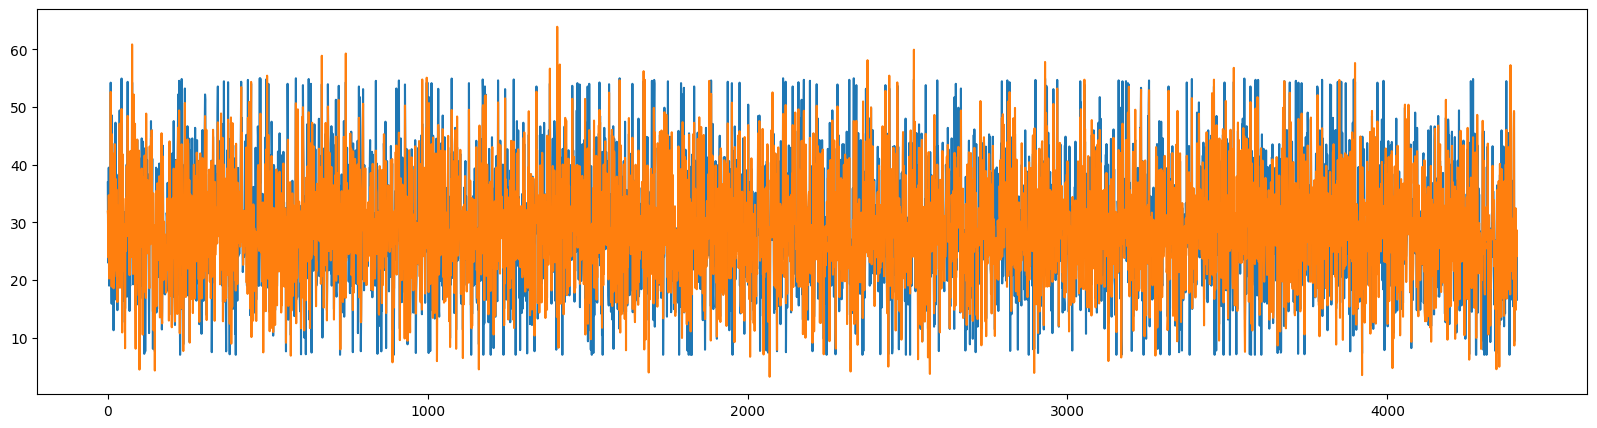

In [31]:
plt.figure(figsize = (20, 5))
plt.plot(y_parkinson_train)
plt.plot(previsoes)

Tanto pelo score quanto pelo gráfico, é possível observar que, para os dados de treino, este preditor se saiu melhor do que a regressão linear múltipla da última sessão.

Agora faça predições para os dados de teste, exiba o erro absoluto médio e o gráfico de comparação.

In [32]:
previsoes = lrp.predict(X_test_poly)
previsoes

array([41.92992686, 49.42764112, 26.10944437, ..., 41.22527692,
       28.62237627, 20.55682835])

In [34]:
mean_absolute_error(y_parkinson_test, previsoes)

10.098161735671887

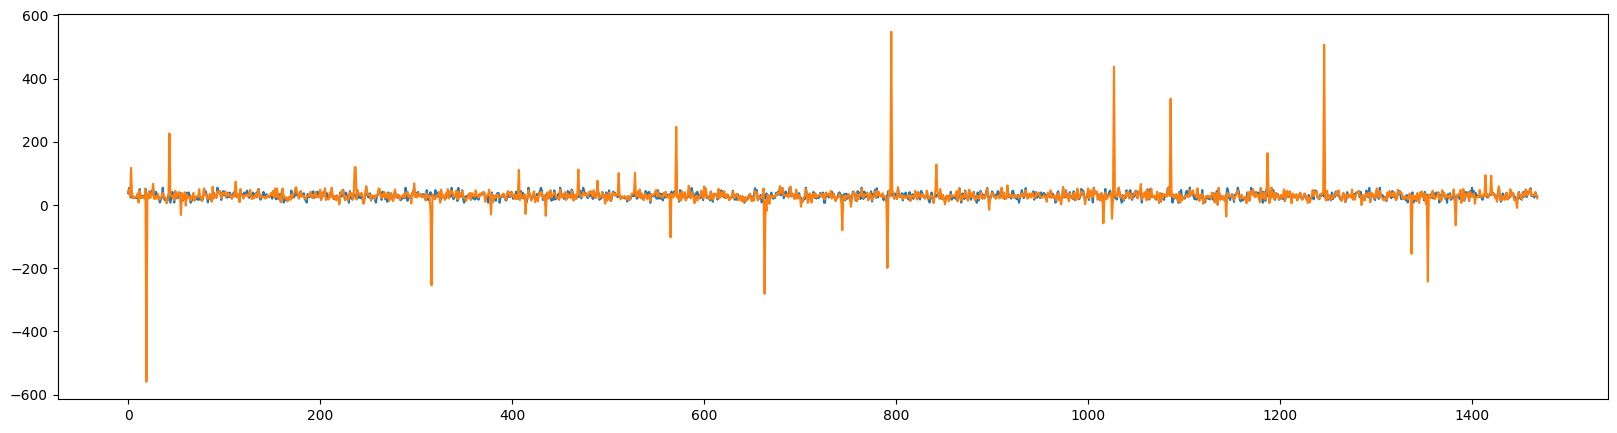

In [35]:
plt.figure(figsize = (20, 5))
plt.plot(y_parkinson_test)
plt.plot(previsoes)

No split de teste, os resultados ficaram ainda piores do que o regressor linear, perceba que o novo regressor fez predições bastante extremas, por isso o gráfico parece achatado.

## Árvores de decisão

Instancie e treine um regressor do tipo árvore de decisão.

In [39]:
tree = DecisionTreeRegressor()
tree.fit(x_parkinson_train, y_parkinson_train)

DecisionTreeRegressor()

Exiba o score deste regressor para os dados de treinamento.

In [40]:
tree.score(x_parkinson_train, y_parkinson_train)

1.0

Este valor indica que as regressões ficaram perfeitas, coincidindo com os valores reais. Faça as predições para este split, exiba o erro absoluto médio e também a comparação no gráfico.

In [41]:
previsoes = tree.predict(x_parkinson_train)
previsoes

array([36.903, 27.275, 22.946, ..., 23.122, 26.002, 16.559])

In [43]:
mean_absolute_error(y_parkinson_train, previsoes)

2.3907843980125933e-16

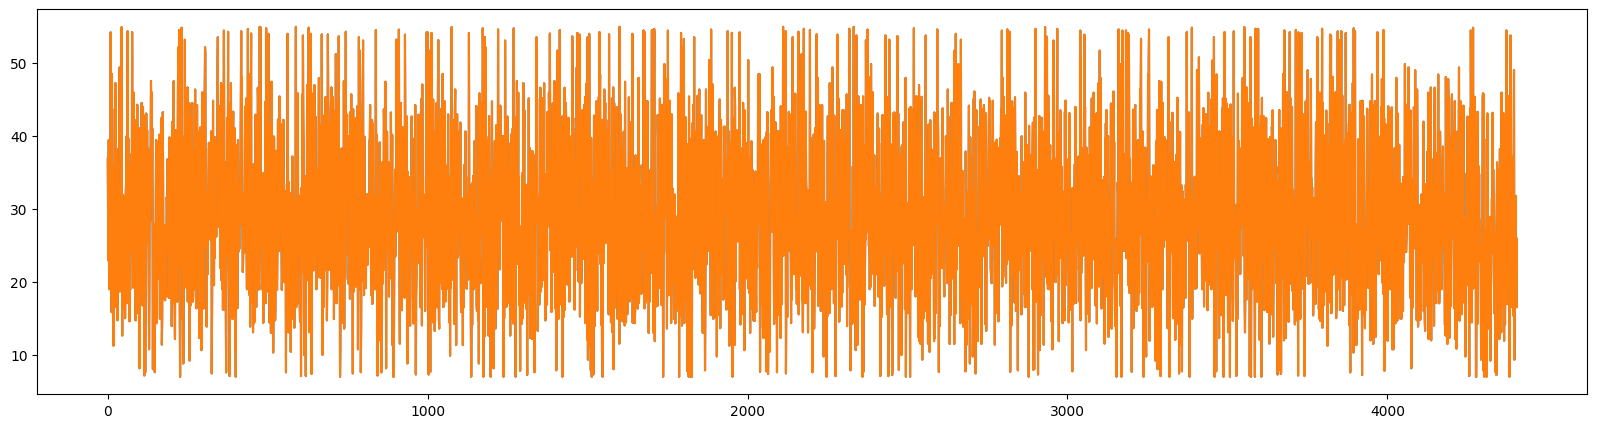

In [44]:
plt.figure(figsize = (20, 5))
plt.plot(y_parkinson_train)
plt.plot(previsoes)

O erro é aproximadamente igual a zero, e o gráfico confirma predições alinhadas com os valores reais.

Agora repita o procedimento de avaliação para o split de teste.

In [46]:
previsoes = tree.predict(x_parkinson_test)
mean_absolute_error(y_parkinson_test, previsoes)

0.7060533696392104

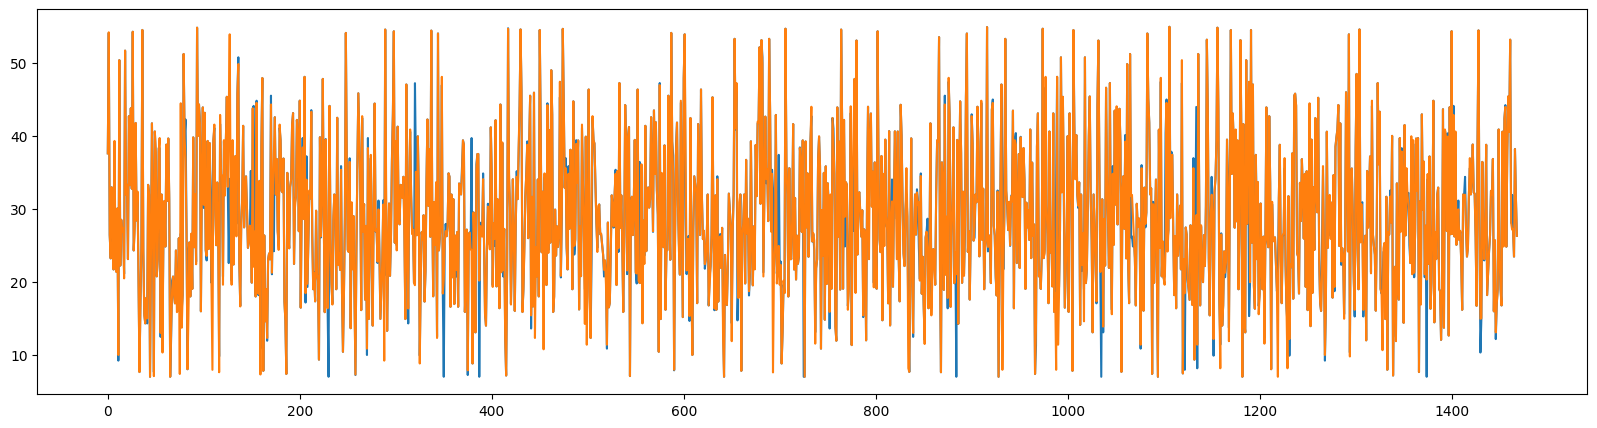

In [47]:
plt.figure(figsize = (20, 5))
plt.plot(y_parkinson_test)
plt.plot(previsoes)

Como é normal, o desempenho no split de teste não ficou tão bom quanto no split de treinamento, mas ainda assim ficou excelente, com poucos valores preditos diferentes dos reais.

## RandomForest

Refaça o exercício agora utilizando um regressor do tipo Random Forest. Utilize `n_estimators=10`.

In [49]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_parkinson_train, y_parkinson_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
previsoes = 

In [ ]:
___

In [ ]:
___

In [ ]:
___

Este regressor ficou um pouco pior que a árvore de decisão no split de treinamento, mas ainda assim muito bom!

E no split de teste?

In [ ]:
___

In [ ]:
___

In [ ]:
___

In [ ]:
___

O score ficou um pouco melhor que a árvore de decisão, apesar de o erro médio ter ficado um pouco maior. Isso indica que, em média, o erro aumentou, mas temos menos valores extremos.

## SVM

Instancie um regressor do tipo SVM, com `kernel="linear"`, e ajuste com os dados de treino.

In [ ]:
___

Exiba o score para os dados de treino e de teste.

In [ ]:
___

In [ ]:
___

Este regressor não se saiu muito bem.

Instancie e treine outro regressor do tipo SVM, mas agora com `kernel="poly"` e `degree=4`.

In [ ]:
___

Exiba os scores.

In [ ]:
___

In [ ]:
___

O resultado ficou ainda pior.

Agora vamos tentar um regressor SVM com `kernel="rbf"`. Para isso, primeiro precisamos escalonar os valores.

Instancie um escalonador para os atributos previsores, e outro para o atributo alvo, ambos do tipo `StandardScaler`.

In [ ]:
scaler_X = ___
___ = ___

Agora escalone os dados de treinamento. Lembre-se que, no caso de `y`, você deve primeiro utilizar `reshape(-1, 1)`, para apresentá-los ao escalonador no formato coluna, e depois da transformação, voltar a linearizá-lo com `ravel()`.

In [ ]:
X_train_scaled = ___.___(___)
y_train_scaled = ___.___(___.reshape(-1, 1)).___

Transforme também os dados de teste.

In [ ]:
X_test_scaled = ___.___(___)
y_test_scaled = ___.___(___).___

Agora sim instancie o regressor e ajuste com os dados escalonados.

In [ ]:
svr_rbf = ___
___

Exiba os scores do regressor.

In [ ]:
___

In [ ]:
___

Os resultados melhoraram em comparação aos outros kernels.

Utilize o regressor para fazer predições no split de teste. Depois, como esses dados estão escalonados, utilize o método `inverse_transform` do escalonador para retorná-los à escala original. Lembre-se dos cuidados com os `shape`s ao invocar o escalonador.

In [ ]:
y_pred = ___
y_pred = ___.inv___(___).___

Agora exiba o erro absoluto médio para os dados de teste em sua escala original.

In [ ]:
___

## Redes neurais artificiais

Instancie um regressor do tipo rede neural, com `max_iter=1000`. Treine este modelo com os dados escalonados.

In [ ]:
neural_net = ___
___

Exiba os scores do regressor.

In [ ]:
___

In [ ]:
___

Faça predições para os dados de teste. Lembre-se de, depois, retornar os valores preditos para sua escala original.

In [ ]:
___

Exiba o erro absoluto médio para os dados de teste.

In [ ]:
___